In [1]:
import numpy as np
import pandas as pd
slump_data = pd.read_csv('slump_test_data_mod.csv')
slump_data.info()
slump_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
No                      103 non-null int64
Cement                  103 non-null float64
Slag                    103 non-null float64
Fly_ash                 103 non-null float64
Water                   103 non-null float64
SP                      103 non-null float64
Coarse_Aggr             103 non-null float64
Fine_Aggr               103 non-null float64
SLUMP                   103 non-null float64
FLOW                    103 non-null float64
Compressive_Strength    103 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.9 KB


Index(['No', 'Cement', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr',
       'Fine_Aggr', 'SLUMP', 'FLOW', 'Compressive_Strength'],
      dtype='object')

In [2]:
#choosing explanatory variables : X
exp_vars = ['Cement', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr', 'Fine_Aggr']
X = slump_data[exp_vars]

# selecting response variable : y
y = slump_data.SLUMP

In [3]:
#import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

C:\Users\KRISHNA\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


r2_square_mean_lin:  0.256946915347
mse_mean_lin:  53.8363977613
mse_mean_las:  55.8374792321
Coefs.that produces the minimum error:  [ 0.01473612 -0.          0.01685403  0.29139523 -0.31708469  0.03158856
  0.03774138] minimum error:  32.3097516355
mse_mean_rig:  53.7500712703
Coef.that produces the minimum error:  [ 0.042488    0.04060353  0.04539437  0.37747263 -0.33322708  0.06493326
  0.07407684] minimum error:  32.4892531383


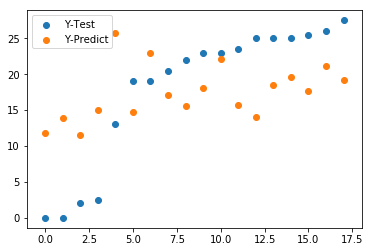

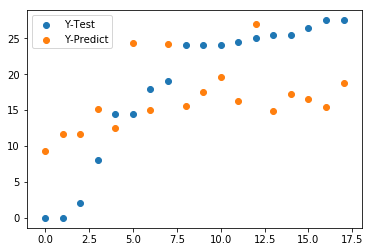

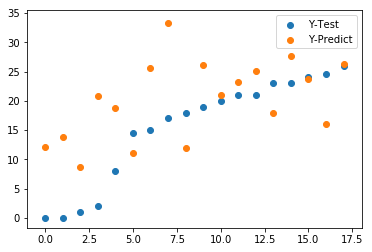

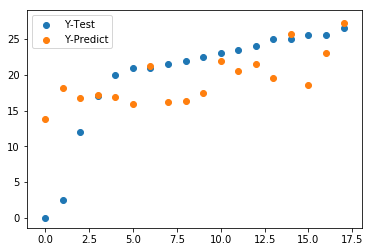

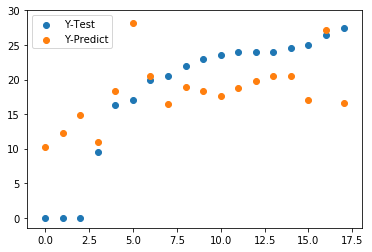

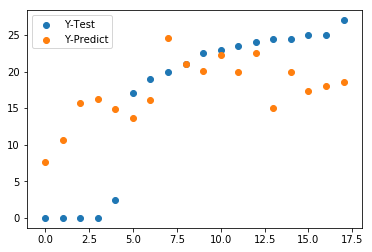

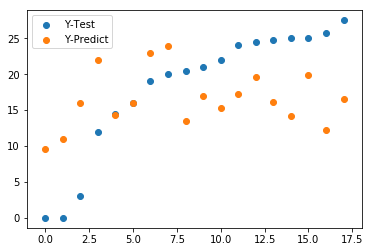

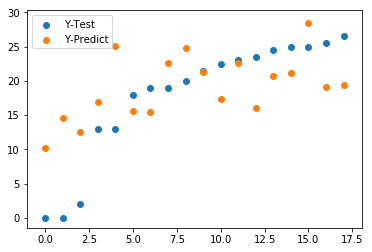

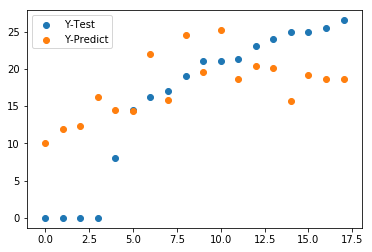

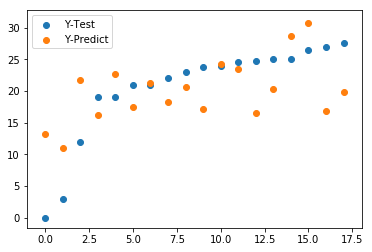

In [16]:
# 10 iterations

r2_scr_fin_lin, mse_fin_lin_lst = [], []
mse_fin_las_lst, mse_fin_rig_lst = [], []
mse_min_val_dict_las, mse_min_val_dict_rig = {}, {}

for val in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(85 / 103), test_size=(18 / 103))

    r2_scr_lin = []
    mse_lin_lst, mse_las_lst, mse_rig_lst = [], [], []
    r2_val_dict_lin = {}
    mse_val_dict_lin, mse_val_dict_las, mse_val_dict_rig = {}, {}, {}

    clf_lin = linear_model.LinearRegression()  # selecting the model: linear
    clf_las = linear_model.Lasso(alpha=1)  # selecting the model: lasso
    clf_rig = linear_model.Ridge(alpha=20)  # selecting the model: ridge

    fold_size = len(X_train) // 5
    for i in range(0, len(X_train), len(X_train) // 5):  # 5 fold CV
        val_X = X_train[i:i + fold_size]
        val_y = y_train[i:i + fold_size]
        train_X = pd.concat([X_train[0:i], X_train[i + fold_size:]])
        train_y = pd.concat([y_train[0:i], y_train[i + fold_size:]])

        # linear regression
        lm = linear_model.LinearRegression()  # selecting the model
        lm.fit(train_X, train_y)  # fitting the model
        val_y_pred_lin = lm.predict(val_X)  # predicting the model
        r2_lin = r2_score(val_y, val_y_pred_lin)  # calculating r^2
        mse_lin = mean_squared_error(val_y, val_y_pred_lin)
        mse_lin_lst.append(mse_lin)
        r2_scr_lin.append(r2_lin)  # saving r^2 value of the current iteration
        r2_val_dict_lin[r2_lin] = [train_X, train_y]  # saving the model data into a dict
        mse_val_dict_lin[mse_lin] = [train_X, train_y]  # saving the model data into a dict

        # lasso regression
        ls = linear_model.Lasso(alpha=1)
        ls.fit(train_X, train_y)
        val_y_pred_las = ls.predict(val_X)
        mse_las = mean_squared_error(val_y, val_y_pred_las)
        mse_las_lst.append(mse_las)
        mse_val_dict_las[mse_las] = [train_X, train_y]  # saving the model data into a dict

        # ridge regression
        ri = linear_model.Ridge(alpha=20)
        ri.fit(train_X, train_y)
        val_y_pred_rig = ri.predict(val_X)
        mse_rig = mean_squared_error(val_y, val_y_pred_rig)
        mse_rig_lst.append(mse_rig)
        mse_val_dict_rig[mse_rig] = [train_X, train_y]  # saving the model data into a dict

    # training the classifier again using the best model returned by CV

    # linear regression r2_square calculation
    clf_lin.fit(r2_val_dict_lin[max(r2_scr_lin)][0], r2_val_dict_lin[max(r2_scr_lin)][1])
    y_test_pred_lin = clf_lin.predict(X_test)
    r2_fin_lin = r2_score(y_test, y_test_pred_lin)  # calculating r^2
    r2_scr_fin_lin.append(r2_fin_lin)
    #plotting graphs for r2_score y-test and y-predict
    zipped = sorted(zip(y_test, y_test_pred_lin))
    unzipped = list(zip(*zipped))
    fig, ax = plt.subplots()
    ax.scatter(range(0, len(y_test), 1), unzipped[0], label = 'Y-Test')
    ax.scatter(range(0, len(y_test_pred_lin), 1), unzipped[1], label = 'Y-Predict')
    ax.legend()
    fig.savefig(str(val))
    fig.show()    

    # mse calculation
    clf_lin.fit(mse_val_dict_lin[min(mse_lin_lst)][0], mse_val_dict_lin[min(mse_lin_lst)][1])
    y_test_pred_lin = clf_lin.predict(X_test)
    mse_fin_lin = mean_squared_error(y_test, y_test_pred_lin)
    mse_fin_lin_lst.append(mse_fin_lin)
            
    # lasso regression mse calculation
    clf_las.fit(mse_val_dict_las[min(mse_las_lst)][0], mse_val_dict_las[min(mse_las_lst)][1])
    y_test_pred_las = clf_las.predict(X_test)
    mse_fin_las = mean_squared_error(y_test, y_test_pred_las)  # calculating mse
    mse_fin_las_lst.append(mse_fin_las)
    mse_min_val_dict_las[mse_fin_las] = [clf_las.coef_]  # saving the coefficients
    
    # ridge regression mse calculation
    clf_rig.fit(mse_val_dict_rig[min(mse_rig_lst)][0], mse_val_dict_rig[min(mse_rig_lst)][1])
    y_test_pred_rig = clf_rig.predict(X_test)
    mse_fin_rig = mean_squared_error(y_test, y_test_pred_rig)  # calculating mse
    mse_fin_rig_lst.append(mse_fin_rig)
    mse_min_val_dict_rig[mse_fin_rig] = [clf_rig.coef_]  # saving the coefficients

r2_square_mean_lin = np.mean(r2_scr_fin_lin)
# print("r2_scr_fin_lin: ", r2_scr_fin_lin)
print("r2_square_mean_lin: ", r2_square_mean_lin)
mse_mean_lin = np.mean(mse_fin_lin_lst)
# print("mse_fin_lin_lst: ", mse_fin_lin_lst)
print("mse_mean_lin: ", mse_mean_lin)

mse_mean_las = np.mean(mse_fin_las_lst)
# print("mse_fin_las_lst: ", mse_fin_las_lst)
print("mse_mean_las: ", mse_mean_las)
print("Coefs.that produces the minimum error: ", mse_min_val_dict_las[min(mse_fin_las_lst)][0], "minimum error: ", min(mse_fin_las_lst))

mse_mean_rig = np.mean(mse_fin_rig_lst)
# print("mse_fin_rig_lst: ", mse_fin_rig_lst)
print("mse_mean_rig: ", mse_mean_rig)
print("Coef.that produces the minimum error: ", mse_min_val_dict_rig[min(mse_fin_rig_lst)][0], "minimum error: ", min(mse_fin_rig_lst))


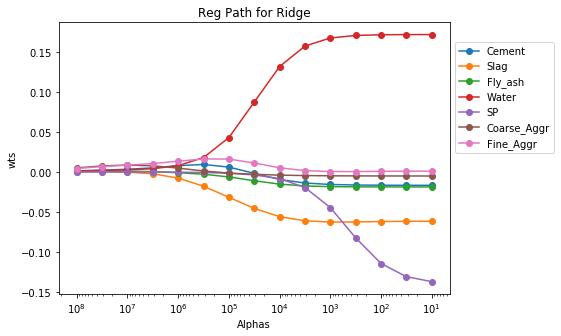

In [25]:
# Reg. Path for ridge
# using the X_train and y_train of the best model found in prev step

X1 = mse_val_dict_rig[min(mse_rig_lst)][0]
y1 = mse_val_dict_rig[min(mse_rig_lst)][1]

no_alphas = 15
all_alphas = np.logspace(1,8,no_alphas)

coefs_lst = []

for i in all_alphas:
    rig = linear_model.Ridge(alpha = i, fit_intercept = False)
    rig.fit(X1, y1)
    coefs_lst.append(rig.coef_)

#plot
plt.figure(figsize=(7, 5))
ax = plt.gca()

ax.plot(all_alphas, coefs_lst, marker = 'o')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylabel('wts')
plt.xlabel('Alphas')
plt.title('Reg Path for Ridge')
plt.legend(('Cement', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr', 'Fine_Aggr'), loc='lower left', bbox_to_anchor=(1, 0.5))
plt.savefig("reg_path_ridge.jpg", bbox_inches = 'tight')
plt.show()

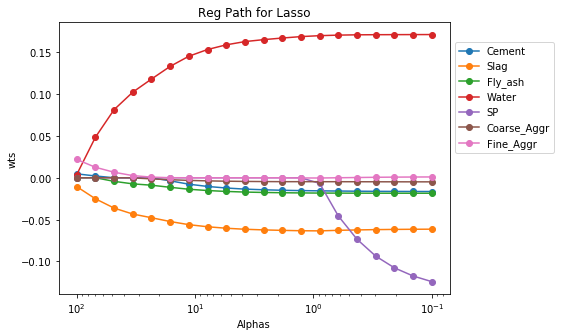

In [24]:
# Reg. Path for lasso
# using the X_train and y_train of the best model found in prev step

X1 = mse_val_dict_las[min(mse_las_lst)][0]
y1 = mse_val_dict_las[min(mse_las_lst)][1]

no_alphas = 20
all_alphas = np.logspace(-1,2,no_alphas)

coefs_lst_las = []

for i in all_alphas:
    las = linear_model.Lasso(alpha = i, fit_intercept = False)
    las.fit(X1, y1)
    coefs_lst_las.append(las.coef_)

#plot
plt.figure(figsize=(7, 5))
ax = plt.gca()

ax.plot(all_alphas, coefs_lst_las, marker = 'o')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylabel('wts')
plt.xlabel('Alphas')
plt.title('Reg Path for Lasso')
plt.legend(('Cement', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr', 'Fine_Aggr'), loc='lower left', bbox_to_anchor=(1, 0.5))
plt.savefig("reg_path_lasso.jpg", bbox_inches = 'tight')
plt.show()